# This is a Prediction model only with one feature i.e the size of the house

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import math, copy

Matplotlib is building the font cache; this may take a moment.


In [2]:

# Reading the data from a CSV File
data = pd.read_csv('data.csv')

temp_XTrain = data.iloc[:,0].values
temp_YTrain = data.iloc[:,2].values

x_train = np.array(list(map(lambda x: x / 1000, temp_XTrain)))
y_train = np.array(list(map(lambda x: x / 1000, temp_YTrain)))
print(f"Number of training examples: {len(x_train)}")

Number of training examples: 46


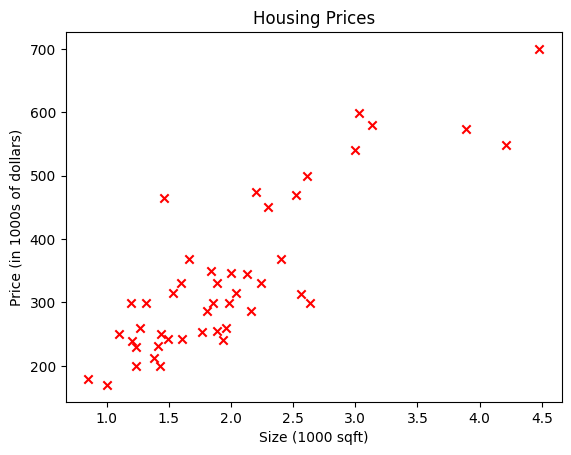

In [3]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [4]:
def compute_gradient(x, y, w, b):

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [5]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Gradident Descent Algorithm

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. It trains machine learning models by minimizing errors between predicted and actual results. Here, it helps in finding w and b.

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [7]:
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w, b, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init,
                b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

Iteration    0: Cost 5.85e+04  dj_dw: -7.625e+02, dj_db: -3.391e+02   w:  7.625e+00, b: 3.39119e+00
Iteration 1000: Cost 2.08e+03  dj_dw:  1.494e-01, dj_db: -3.372e-01   w:  1.357e+02, b: 6.76703e+01
Iteration 2000: Cost 2.08e+03  dj_dw:  4.749e-02, dj_db: -1.072e-01   w:  1.348e+02, b: 6.96762e+01
Iteration 3000: Cost 2.08e+03  dj_dw:  1.509e-02, dj_db: -3.406e-02   w:  1.345e+02, b: 7.03136e+01
Iteration 4000: Cost 2.08e+03  dj_dw:  4.796e-03, dj_db: -1.082e-02   w:  1.344e+02, b: 7.05162e+01
Iteration 5000: Cost 2.08e+03  dj_dw:  1.524e-03, dj_db: -3.440e-03   w:  1.344e+02, b: 7.05806e+01
Iteration 6000: Cost 2.08e+03  dj_dw:  4.844e-04, dj_db: -1.093e-03   w:  1.344e+02, b: 7.06011e+01
Iteration 7000: Cost 2.08e+03  dj_dw:  1.539e-04, dj_db: -3.475e-04   w:  1.344e+02, b: 7.06076e+01
Iteration 8000: Cost 2.08e+03  dj_dw:  4.893e-05, dj_db: -1.104e-04   w:  1.344e+02, b: 7.06097e+01
Iteration 9000: Cost 2.08e+03  dj_dw:  1.555e-05, dj_db: -3.509e-05   w:  1.344e+02, b: 7.06103e+01


In [8]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

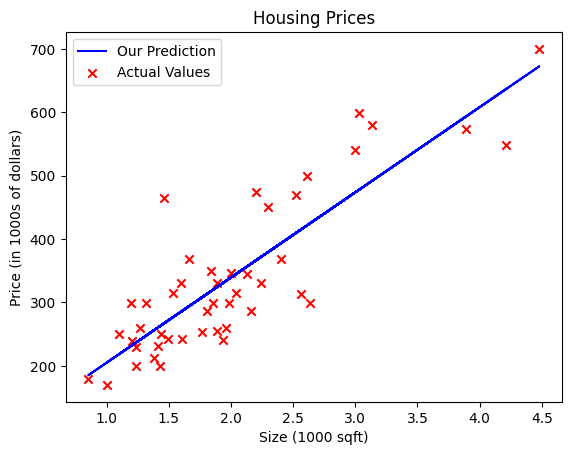

1000 sqft house prediction 205.0 Thousand dollars
1600 sqft house prediction 285.6 Thousand dollars
2000 sqft house prediction 339.3 Thousand dollars
3000 sqft house prediction 473.7 Thousand dollars


In [10]:
tmp_f_wb = compute_model_output(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Sample testing
print(f"1000 sqft house prediction {w*1.0 + b:0.1f} Thousand dollars")
print(f"1600 sqft house prediction {w*1.6 + b:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w*2.0 + b:0.1f} Thousand dollars")
print(f"3000 sqft house prediction {w*3.0 + b:0.1f} Thousand dollars")